In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [239]:
#read the file and clean the data
df = pd.read_csv('/Users/ritika/kaggle_projects/MSFOS/df_15.csv')
df = df[['X0MATERIAL','ZDEPMENT','X0PLANT','X0CALDAY','X0CALMONTH','X0CALYEAR','qty']]
df = df[df['X0PLANT'].notna()]
df['X0CALDAY'] = pd.to_datetime(df['X0CALDAY'],format='%Y%m%d')
#df.info()
#df.head()
#df.columns

In [240]:
#Aggregate the data at Department level:
df_grp_dep =df.groupby(['ZDEPMENT','X0CALDAY'])['qty'].sum()
df_grp_dep=df_grp_dep.reset_index()
#df_grp_dep

In [248]:
#decompose the series

df_grp_dep=df_grp_dep[['X0CALDAY','qty']]


In [249]:
#Fill up the missing dates
r = pd.date_range(start=df_grp_dep.X0CALDAY.min(), end=df_grp_dep.X0CALDAY.max())
df_grp_dep=df_grp_dep.set_index('X0CALDAY').reindex(r).fillna(0.0).rename_axis('X0CALDAY').reset_index()

<AxesSubplot:xlabel='X0CALDAY'>

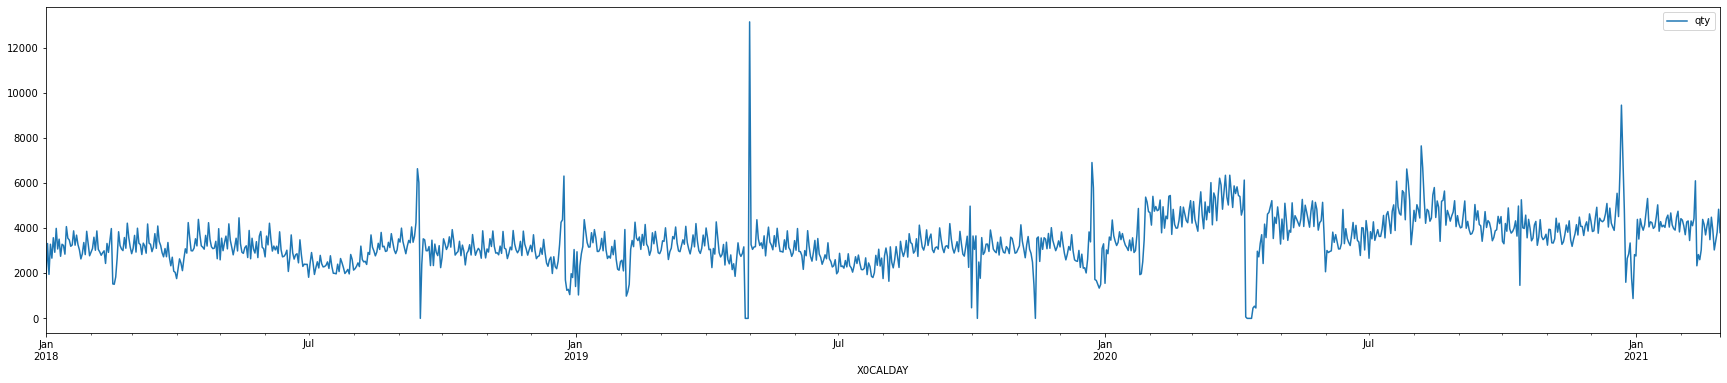

In [185]:
df_grp_dep.plot(kind='line',x='X0CALDAY',y='qty',figsize=(30, 6))

In [250]:
result=seasonal_decompose(df_grp_dep['qty'], model='additive',period=365)

<AxesSubplot:>

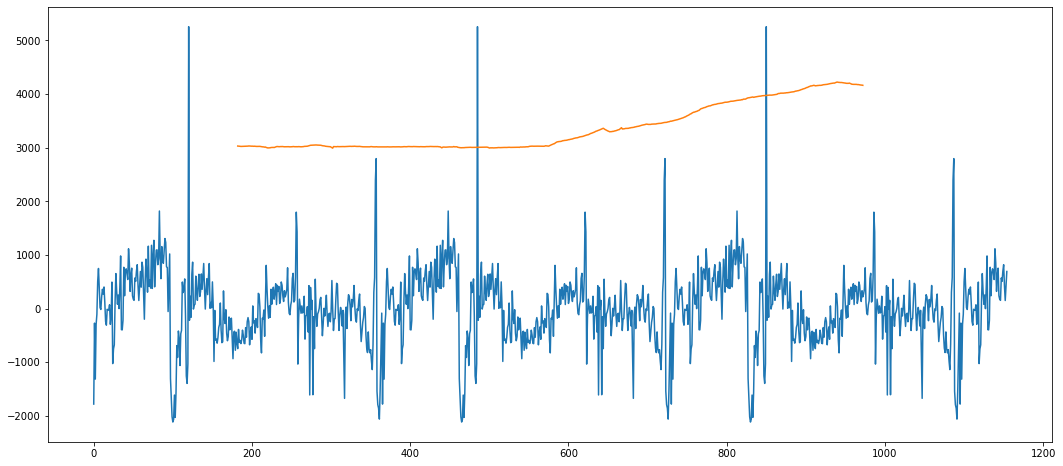

In [255]:
result.seasonal.plot()
result.trend.plot()

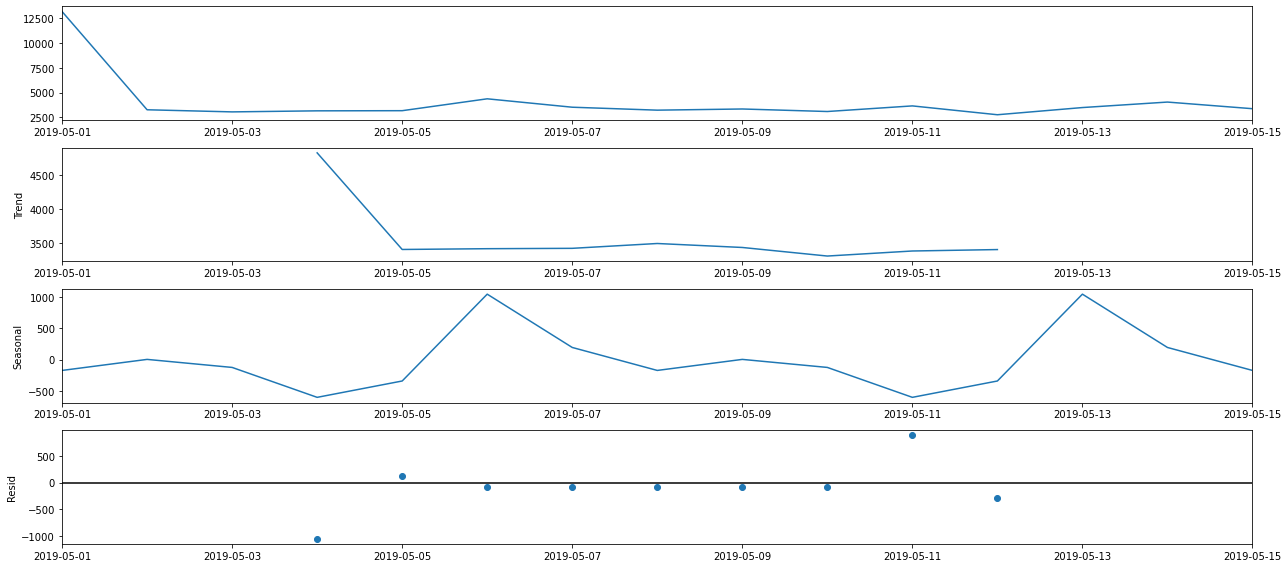

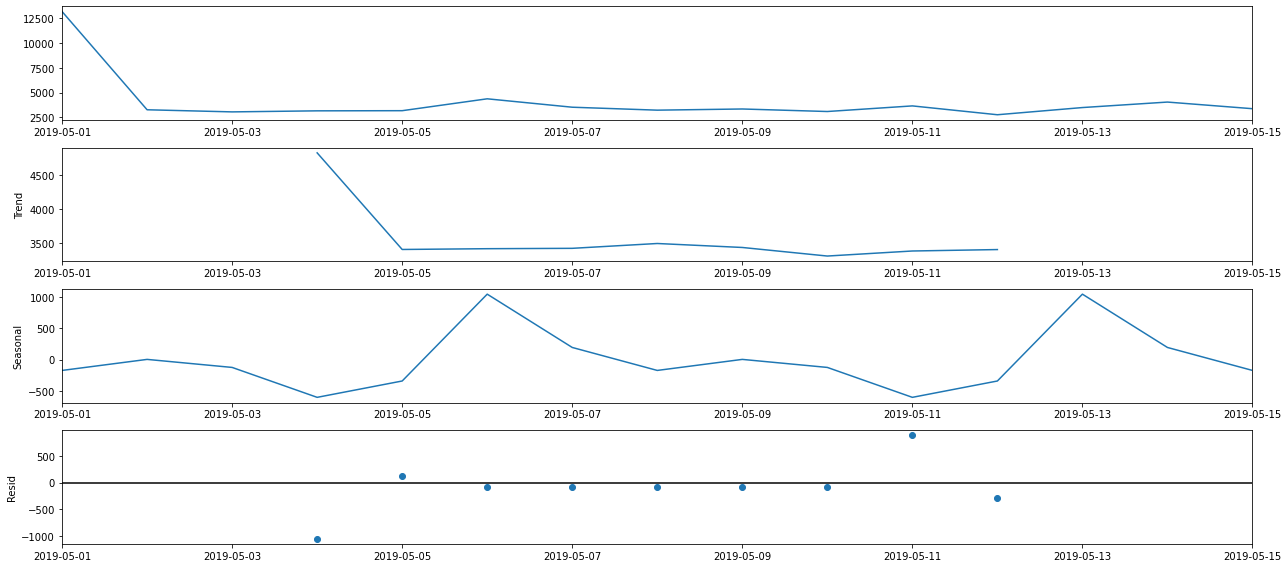

In [252]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


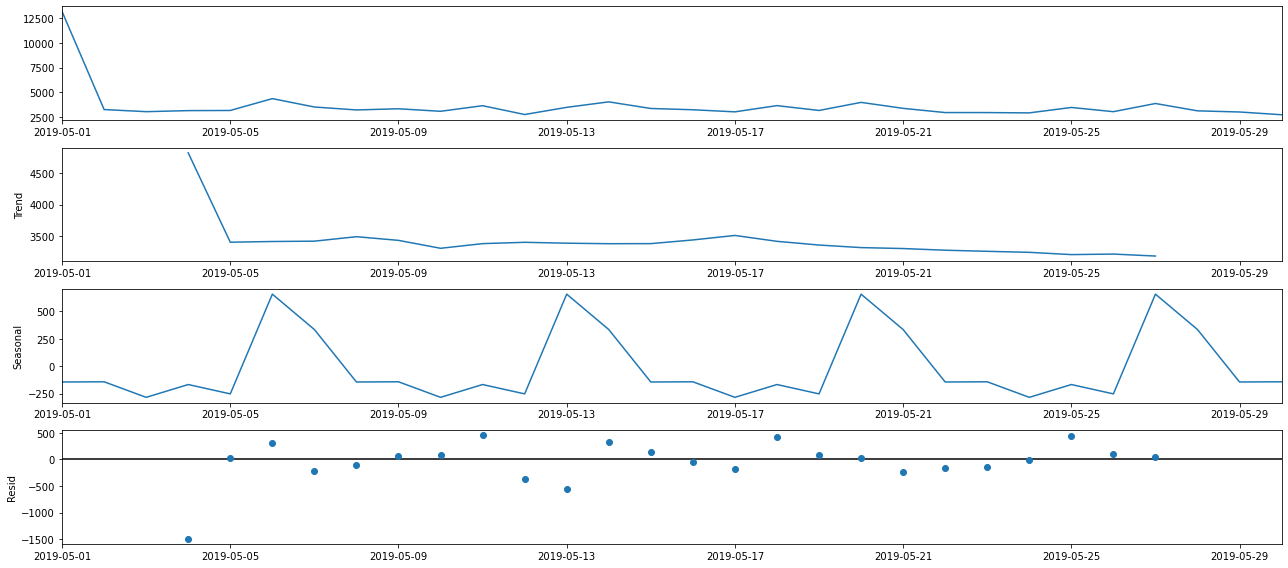

In [254]:
df_grp_dep=df_grp_dep.reset_index()
df_grp_dep=df_grp_dep[df_grp_dep.X0CALDAY.between('2019-05-01','2019-05-30')]
df_grp_dep = df_grp_dep.set_index('X0CALDAY')

decomposition = sm.tsa.seasonal_decompose(df_grp_dep, model='additive')
fig=decomposition.plot()

In [ ]:
#Find outliers in the data 